In [1]:
!tar -xvzf density_fields_3D_LH_z0_grid512_masCIC.tar.gz my_outputs/sim0_LH_z0_grid512_masCIC.h5
!tar -xvzf density_fields_3D_LH_z0_grid512_masCIC.tar.gz my_outputs/sim1_LH_z0_grid512_masCIC.h5
!tar -xvzf density_fields_3D_LH_z0_grid512_masCIC.tar.gz my_outputs/sim2_LH_z0_grid512_masCIC.h5
!tar -xvzf density_fields_3D_LH_z0_grid512_masCIC.tar.gz my_outputs/sim3_LH_z0_grid512_masCIC.h5
!tar -xvzf density_fields_3D_LH_z0_grid512_masCIC.tar.gz my_outputs/sim4_LH_z0_grid512_masCIC.h5
!tar -xvzf density_fields_3D_LH_z0_grid512_masCIC.tar.gz my_outputs/sim5_LH_z0_grid512_masCIC.h5
!tar -xvzf density_fields_3D_LH_z0_grid512_masCIC.tar.gz my_outputs/sim6_LH_z0_grid512_masCIC.h5
!tar -xvzf density_fields_3D_LH_z0_grid512_masCIC.tar.gz my_outputs/sim7_LH_z0_grid512_masCIC.h5

my_outputs/sim0_LH_z0_grid512_masCIC.h5
my_outputs/sim1_LH_z0_grid512_masCIC.h5
my_outputs/sim2_LH_z0_grid512_masCIC.h5
my_outputs/sim3_LH_z0_grid512_masCIC.h5
my_outputs/sim4_LH_z0_grid512_masCIC.h5
my_outputs/sim5_LH_z0_grid512_masCIC.h5
my_outputs/sim6_LH_z0_grid512_masCIC.h5
my_outputs/sim7_LH_z0_grid512_masCIC.h5


In [5]:
import h5py
import numpy as np
import glob
import Pk_library as PKL

import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_context("paper", font_scale = 2)
# sns.set_style('whitegrid')
# sns.set(style='ticks')

In [6]:
COSMO_PARAMS_NAMES = ['Omega_m', 'Omega_b', 'h', 'n_s', 'sigma_8']
# COLORS = ['black', 'red', 'lightblue', 'green', '#bf9005']

titlesize = 13
axeslabelsize = 16
ticklabelsize = 14

In [7]:
def format_string_cosmo_params(cosmo_params):
    return dict(zip(COSMO_PARAMS_NAMES, cosmo_params))

def read_hdf5(filename):
    hf = h5py.File(filename, 'r')
    dataset = hf.get('3D_density_field')
    cosmo_params = dataset.attrs['cosmo_params']
    density_field = dataset[:]

    return density_field, cosmo_params

def compute_ps3d(density_field):
    BoxSize = 1000.0  # in Mpc/h
    axis = 0  # Since the density field is in real-space.
    MAS = 'CIC'  # Since the density fields were computed using CIC.
    threads = 2
    verbose = True

    # Compute density contrast.
    density_field = density_field / np.mean(density_field, dtype=np.float64)
    density_field = density_field - 1.0

    # Compute power spectrum.
    Pk = PKL.Pk(density_field, BoxSize, axis, MAS, threads, verbose)

    k       = Pk.k3D
    Pk0     = Pk.Pk[:,0] # Monopole
    Pkphase = Pk.Pkphase # Power spectrum of the phases
    Nmodes  = Pk.Nmodes3D

    return k, Pk0

In [8]:
klist = []
Pklist = []
cosmo_params_list = []
dlist = []

for filename in sorted(glob.glob('my_outputs/*grid512*.h5')):
    density_field, cosmo_params = read_hdf5(filename)
    k, Pk = compute_ps3d(density_field)
    print(cosmo_params)
    print(fr'$\Omega_mh = {cosmo_params[0] * cosmo_params[2]}$')

    klist.append(k)
    Pklist.append(Pk)
    cosmo_params_list.append(cosmo_params)
    dlist.append(density_field)


Computing power spectrum of the field...
Time to complete loop = 4.21
Time taken = 6.15 seconds
[0.1755  0.06681 0.7737  0.8849  0.6641 ]
$\Omega_mh = 0.13578435$

Computing power spectrum of the field...
Time to complete loop = 4.14
Time taken = 5.93 seconds
[0.2139  0.05557 0.8599  0.9785  0.8619 ]
$\Omega_mh = 0.18393261$

Computing power spectrum of the field...
Time to complete loop = 4.13
Time taken = 5.92 seconds
[0.1867  0.04503 0.6189  0.8307  0.7187 ]
$\Omega_mh = 0.11554863$

Computing power spectrum of the field...
Time to complete loop = 4.10
Time taken = 5.88 seconds
[0.3271  0.06875 0.6313  0.8135  0.8939 ]
$\Omega_mh = 0.20649823$

Computing power spectrum of the field...
Time to complete loop = 4.15
Time taken = 5.93 seconds
[0.1433  0.06347 0.6127  1.1501  0.7699 ]
$\Omega_mh = 0.08779991000000001$

Computing power spectrum of the field...
Time to complete loop = 4.14
Time taken = 5.92 seconds
[0.4813  0.05637 0.5331  0.9041  0.9289 ]
$\Omega_mh = 0.25658103$

Comput

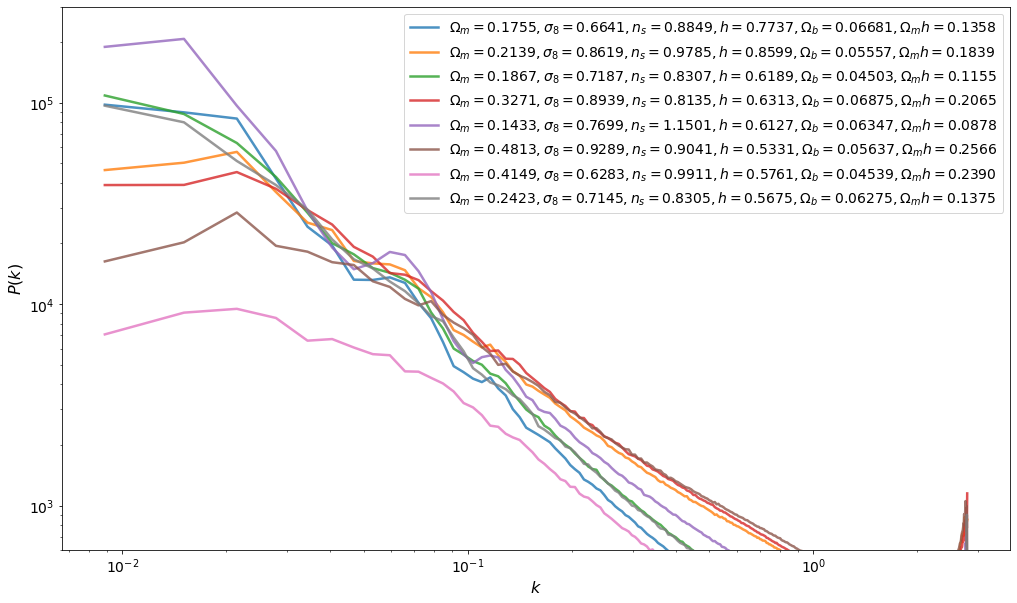

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(17, 10))
for i, (k, Pk, cosmo_params) in enumerate(zip(klist, Pklist, cosmo_params_list)):
    ax.loglog(k, Pk, label=fr'$\Omega_m = {cosmo_params[0]}, \sigma_8 = {cosmo_params[-1]}, n_s = {cosmo_params[-2]}, h = {cosmo_params[-3]}, \Omega_b = {cosmo_params[1]}, \Omega_m h = {cosmo_params[0]*cosmo_params[-3]:.4f}$', linewidth=2.5, alpha=0.8)

ax.set_ylabel(r'$P(k)$', fontsize=axeslabelsize)
ax.set_xlabel(r'$k$', fontsize=axeslabelsize)
lgn = ax.legend(fontsize=ticklabelsize)
ax.set_ylim([0.6e3, 3e5])

for legobj in lgn.legendHandles:
    legobj.set_linewidth(2.5)

ax.tick_params(axis='both', which='major', labelsize=ticklabelsize)
ax.tick_params(axis='both', which='minor', labelsize=ticklabelsize)

plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


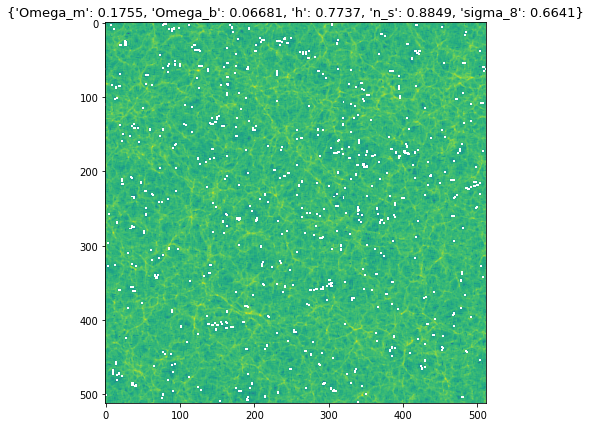

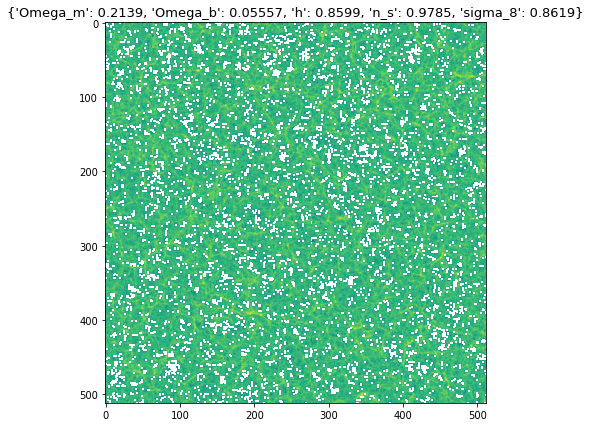

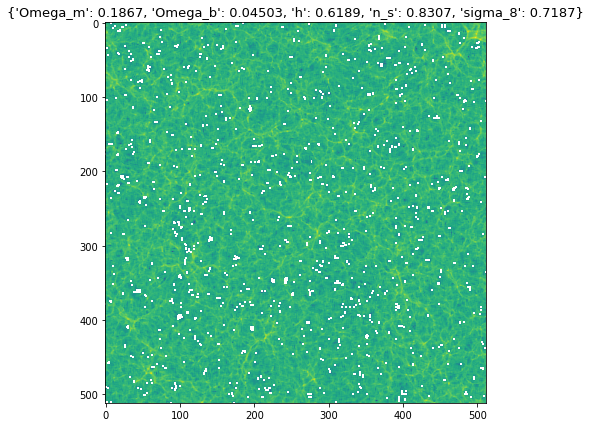

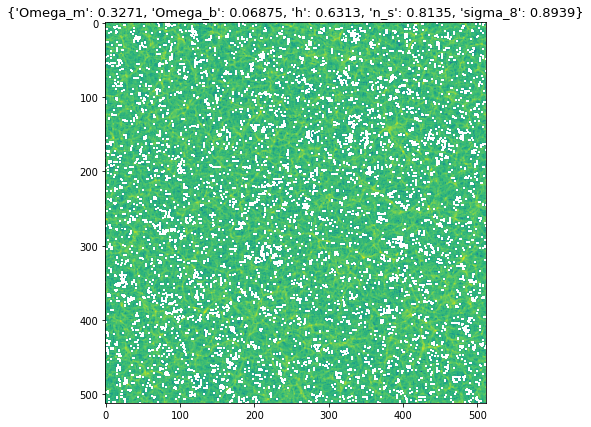

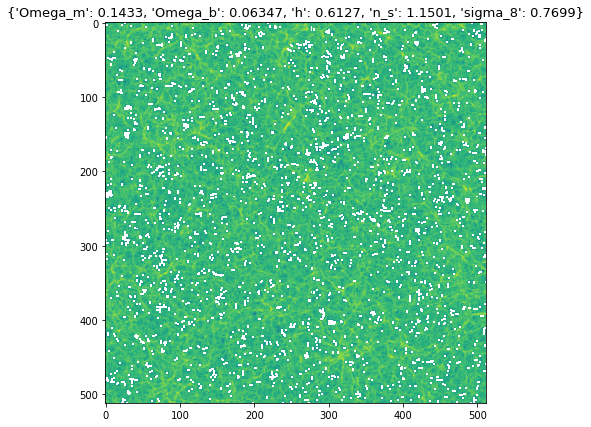

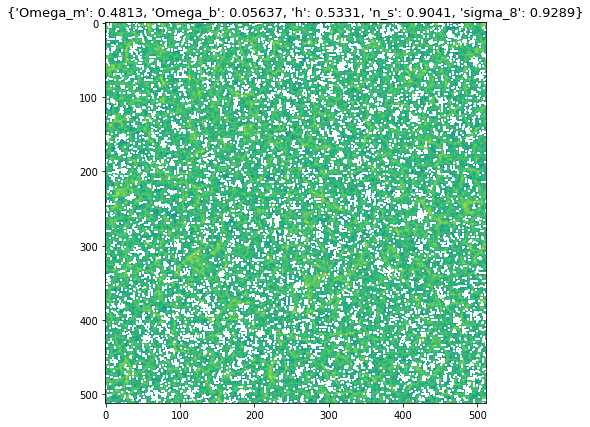

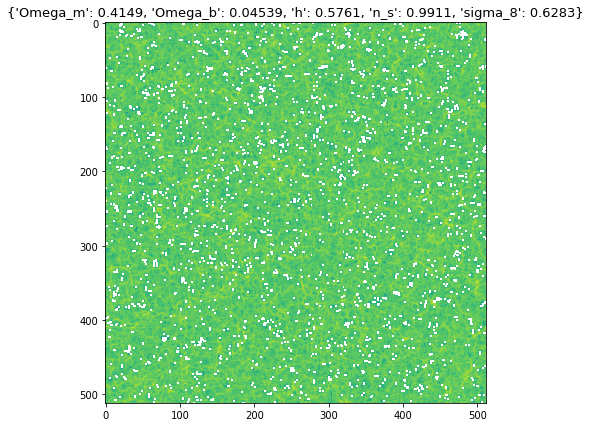

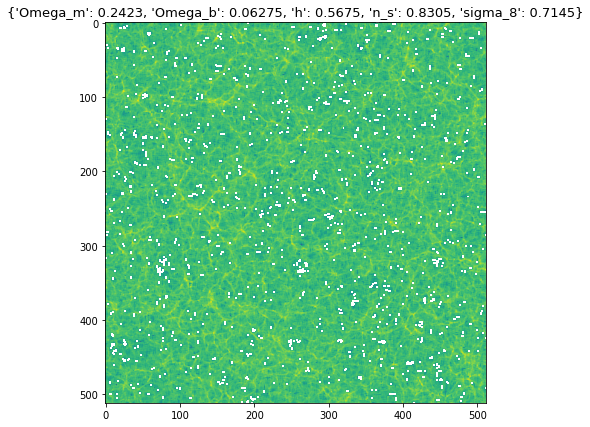

In [10]:
for (den, cosmo_params) in zip(dlist, cosmo_params_list):
    fig, ax = plt.subplots(1, 1, figsize=(8, 7))
    ax.imshow(np.log10(den[:, 10, :]));
    ax.set_title(f'{format_string_cosmo_params(cosmo_params)}', fontsize=titlesize)
    plt.show()

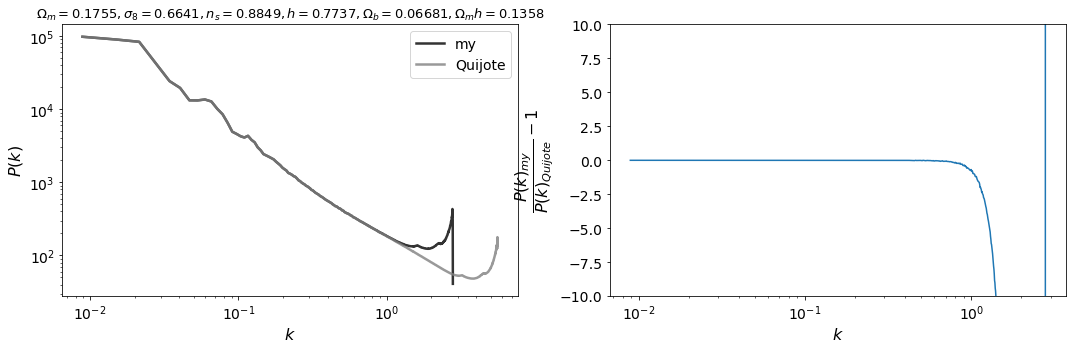

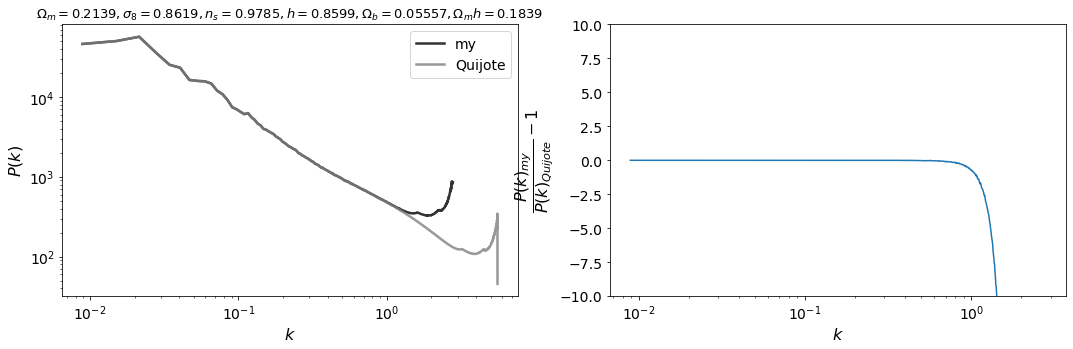

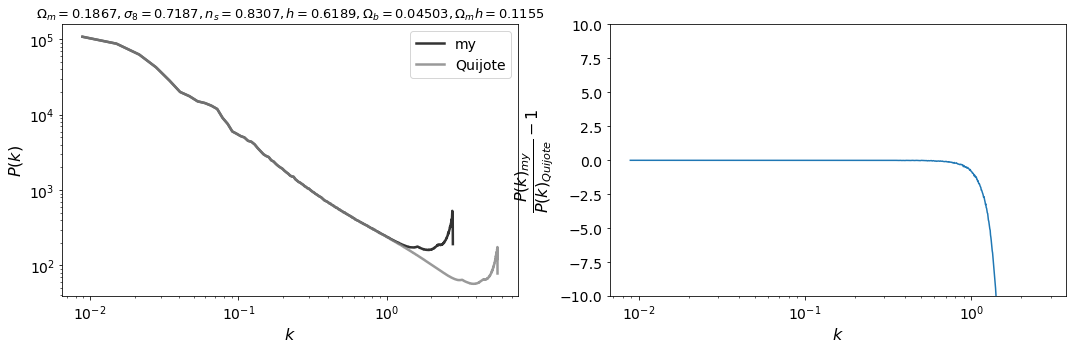

In [12]:
for i, (k, Pk, cosmo_params) in enumerate(zip(klist, Pklist, cosmo_params_list)):
    if i == 3:  # only first three to select.
        break

    fig, ax = plt.subplots(1, 2, figsize=(18, 5))
    ax[0].set_title(fr'$\Omega_m = {cosmo_params[0]}, \sigma_8 = {cosmo_params[-1]}, n_s = {cosmo_params[-2]}, h = {cosmo_params[-3]}, \Omega_b = {cosmo_params[1]}, \Omega_m h = {cosmo_params[0]*cosmo_params[-3]:.4f}$', fontsize=titlesize)
    ax[0].loglog(k, Pk, linewidth=2.5, alpha=0.8, c='black', label='my')

    kQ, PkQ = np.loadtxt(f'my_outputs/Pk_matter_latin_hypercube_{i}_Pk_m_z=0.txt', unpack=True)
    ax[0].loglog(kQ, PkQ, c='gray', label='Quijote', linewidth=2.5, alpha=0.8)
    
    ax[0].set_ylabel(r'$P(k)$', fontsize=axeslabelsize)
    ax[0].set_xlabel(r'$k$', fontsize=axeslabelsize)
    lgn = ax[0].legend(fontsize=ticklabelsize)

    for legobj in lgn.legendHandles:
        legobj.set_linewidth(2.5)
    
    ax[1].plot(k, 100*(1 - (Pk/PkQ[:len(k)])))
    ax[1].set_ylim([-10, +10])
    ax[1].set_xscale('log')
    ax[1].set_ylabel(r'$\dfrac{P(k)_{my}}{P(k)_{Quijote}}-1$', fontsize=axeslabelsize)
    ax[1].set_xlabel(r'$k$', fontsize=axeslabelsize)

    for a in ax:
        a.tick_params(axis='both', which='major', labelsize=ticklabelsize)
        a.tick_params(axis='both', which='minor', labelsize=ticklabelsize)

    plt.show()